<a href="https://colab.research.google.com/github/Catia2021/Projeto4_Machine_Learning_Iris/blob/main/Projeto_Machine_Learning_Iris3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tema do Projeto: Espécies da Planta Iris

#Apresentação dos Dados

Neste estudo serão utilizados dados coletados do repositório Kaggle disponibilizados no seguinte link: (https://www.kaggle.com/saurabh00007/iriscsv?select=Iris.csv)

Com base neste dataset, será feito um modelo preditivo para identificar as espécies de Iris.


#Problema a ser resolvido

Identificar as três  espécies  da  planta do  Gênero Iris: setosa, virgínica e versicolor

#Objetivos do Projeto

Instalar e importar bibliotecas apropriadas

Processar os dados

Estabelecer as Variáveis Preditoras e de Classe

Realizar tratamento de atributos categóricos usando o LabelEncoder 

Escalonar os Atributos

Dividir a base de dados em Treinamento e Teste

Treinar o algoritimo Árvore de Decisão
Testar o algoritmo utilizando a matriz de confusão, a função accuracy_score e a classification_report

#Importando Bibliotecas e Dados

In [ ]:
! pip install pyod

In [2]:
import pandas as pd  # biblioteca para manipulação de dados
import numpy as np # biblioteca para manipulação de  dados numéricos
import seaborn as sns # biblioteca para otimizar gráficos
import matplotlib.pyplot as plt # biblioteca para geração de gráficos
import plotly.express as px  # biblioteca para geração de gráficos interativos
import sklearn # bilioteca para subsidiar Machine Learning
import plotly.graph_objects as go # para concatenar graficos
from sklearn.preprocessing import StandardScaler #para escalonar variaveis
from sklearn.tree import DecisionTreeClassifier#  para  usar a Arvore de Decisao
from sklearn import tree # para visualizar a arvore
from sklearn.preprocessing import LabelEncoder #para transformar  variaveis
from sklearn.preprocessing import OneHotEncoder #para transformar variaveis
from sklearn.compose import ColumnTransformer #para transformar variaveis
from sklearn.model_selection import train_test_split  #para dividir base de teste e treinamento
from sklearn.metrics import accuracy_score #para avaliar a acurácia
import pickle #para fazer leitura do arquivo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from seaborn.categorical import boxplot
% matplotlib inline
from pyod. models.knn import KNN
from yellowbrick.classifier import ConfusionMatrix
from numpy.ma.core import filled
from IPython.core.pylabtools import figsize


In [ ]:
!pip  install plotly --upgrade

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


#Processamento dos Dados

In [5]:
Iris = pd.read_csv ('Iris.csv')

In [6]:
print( ' Este dataset tem %s linhas e %s colunas' % (Iris.shape[0] , Iris.shape[1] ) )
Iris.head(10)

 Este dataset tem 150 linhas e 6 colunas


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
Iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


**Acima você pode conferir as primeiras  e últimas  linhas do dataset e o total de linhas e colunas. Como os dados podem causar certa confusão, será alterado o idioma dos cabeçalhos das colunas.**

In [8]:
Iris.columns = ['ID','ComprimentoCM_Da_Sepala',' LarguraCM_Da_Sepala','ComprimentoCM_Da_Petala','LarguraCM_Da_Petala','Especies']

In [9]:
Iris.head(10)

,ID,ComprimentoCM_Da_Sepala,LarguraCM_Da_Sepala,ComprimentoCM_Da_Petala,LarguraCM_Da_Petala,Especies
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


**Como não será  necessário utilizar a coluna ID, para a classificação, será utilizada a função drop para exclui-la.**

In [10]:
Iris = Iris.drop('ID', axis=1)

In [11]:
Iris.tail()

,ComprimentoCM_Da_Sepala,LarguraCM_Da_Sepala,ComprimentoCM_Da_Petala,LarguraCM_Da_Petala,Especies
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


**Vejamos um Resumo do Dataset**

In [12]:
Iris.describe()

,ComprimentoCM_Da_Sepala,LarguraCM_Da_Sepala,ComprimentoCM_Da_Petala,LarguraCM_Da_Petala
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Após este pré-processamento inicial será caracterizado os tipos de variáveis e seus significados.**


In [13]:
Iris.dtypes

ComprimentoCM_Da_Sepala    float64
 LarguraCM_Da_Sepala       float64
ComprimentoCM_Da_Petala    float64
LarguraCM_Da_Petala        float64
Especies                    object
dtype: object

**Se tem 4 variáveis Numéricas e 1 Categórica, assim classificadas:**

ComprimentoCM_Da_Sepala, LarguraCM_Da_Sepala,ComprimentoCM_Da_Petala, LarguraCM_Da_Petala: Numérica Contínua

Especies : Categórica Nominal


**Dicionário de Dados**


*  ComprimentoCM_Da_Sepala:Comprimento em centímetro da Sépala

*   LarguraCM_Da_Sepala:Largura em centímetro da Sépala
*   ComprimentoCM_Da_Petala:Comprimento em centímetro da Pétala

*   LarguraCM_Da_Petala:Largura em centímetro da Pétala

* Especies: Espécies da planta com flor do  gênero Iris 

**Prosseguindo o processamento de dados, será analisado se há valores faltantes e inconsistentes**

In [14]:
Iris.isnull()

,ComprimentoCM_Da_Sepala,LarguraCM_Da_Sepala,ComprimentoCM_Da_Petala,LarguraCM_Da_Petala,Especies
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [15]:
Iris.isnull().sum()

ComprimentoCM_Da_Sepala    0
 LarguraCM_Da_Sepala       0
ComprimentoCM_Da_Petala    0
LarguraCM_Da_Petala        0
Especies                   0
dtype: int64

In [16]:
Iris.loc[Iris['ComprimentoCM_Da_Sepala']<=0]

,ComprimentoCM_Da_Sepala,LarguraCM_Da_Sepala,ComprimentoCM_Da_Petala,LarguraCM_Da_Petala,Especies


In [17]:
Iris.loc[Iris[' LarguraCM_Da_Sepala']<=0]

,ComprimentoCM_Da_Sepala,LarguraCM_Da_Sepala,ComprimentoCM_Da_Petala,LarguraCM_Da_Petala,Especies


In [18]:
Iris.loc[Iris['ComprimentoCM_Da_Petala']<=0]

,ComprimentoCM_Da_Sepala,LarguraCM_Da_Sepala,ComprimentoCM_Da_Petala,LarguraCM_Da_Petala,Especies


In [19]:
Iris.loc[Iris['LarguraCM_Da_Petala']<=0]

,ComprimentoCM_Da_Sepala,LarguraCM_Da_Sepala,ComprimentoCM_Da_Petala,LarguraCM_Da_Petala,Especies


In [20]:
np.unique(Iris['Especies'],return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([50, 50, 50]))

**Não foram observados valores inconsistentes  ou  faltantes nos  registros, e,  os  dados  da classe target estão  balanceados. Agora, serão  feitas as  Visualizações gráficas, que  ajudam a identificar,também, existência de valores inconsistentes**

#Visualizando Gráficos

In [21]:
Especies = Iris['Especies'].value_counts()

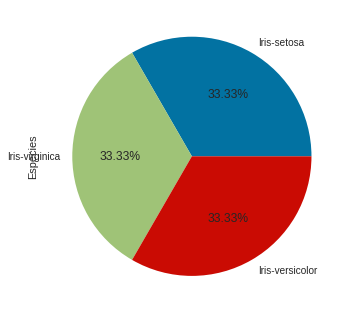

In [22]:
Especies.plot(kind ='pie',autopct='%1.2f%%')

**Já  se  percebe que existe a mesma quantidade de espécies no dataset.**

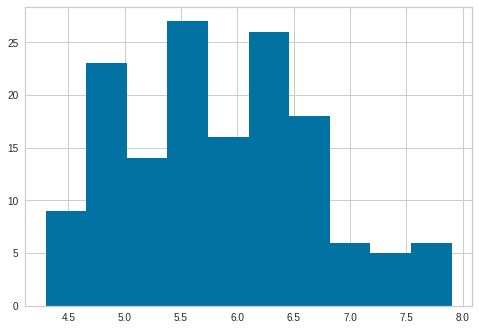

In [23]:
plt.hist(x=Iris['ComprimentoCM_Da_Sepala']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



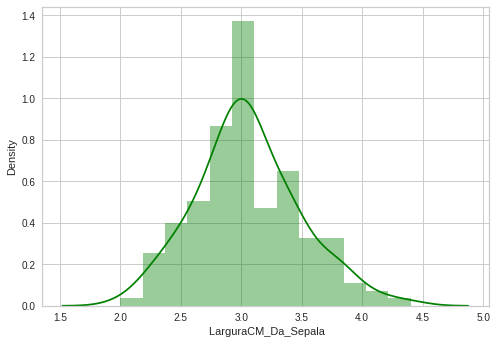

In [24]:
sns.distplot(Iris[' LarguraCM_Da_Sepala'],color='green');

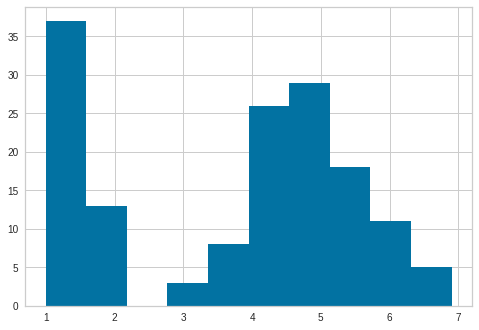

In [25]:
Iris['ComprimentoCM_Da_Petala'].hist()

In [26]:
Especies = Iris['LarguraCM_Da_Petala'].value_counts()

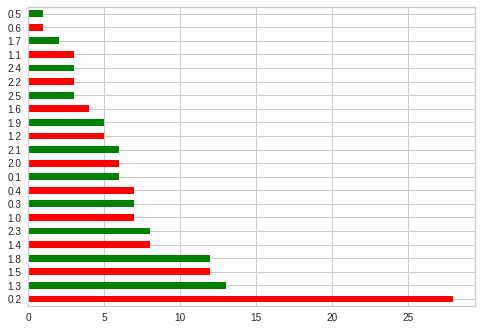

In [27]:
Especies.plot(kind ='barh',color=['red','green'])

**Feito as  visualizações acima, percebe-se que  reproduz  os dados  da descrição geral e  que não há  valores inconsistentes.**

**Verificando se há  Outliers.**

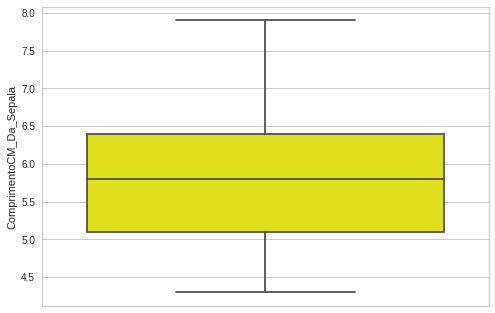

In [28]:
sns.boxplot(y='ComprimentoCM_Da_Sepala',data= Iris,color='yellow');

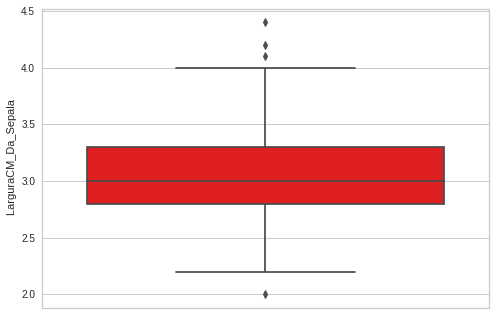

In [29]:
sns.boxplot(y=' LarguraCM_Da_Sepala',data= Iris,color='red');

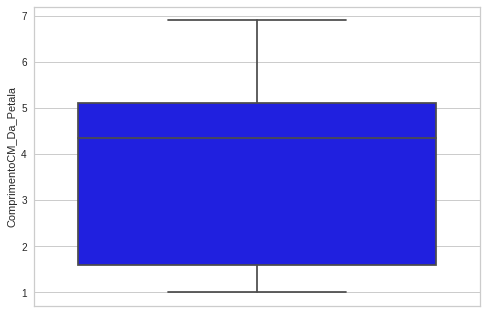

In [30]:
sns.boxplot( y='ComprimentoCM_Da_Petala',data= Iris,color='blue');

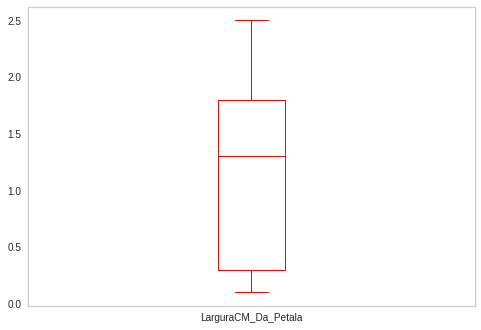

In [31]:
Iris.boxplot( column =['LarguraCM_Da_Petala'], grid = False,color = 'red')

**Na  Visualização de Largura da Sepala há registros de outlieres. Será feito então uma  análise  mais  refinada usando a  biblioteca pyod.**

In [32]:
detector = KNN()
detector.fit(Iris.iloc[:,0:4])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [33]:
previsores = detector.labels_
previsores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
np.unique( previsores,return_counts=True)

(array([0, 1]), array([135,  15]))

**Foram detectados 15 outliers. O número 0 representa a não presença de outliers e o 1 a presença.**

**Verificando a confiabilidade dos previsores.**

In [ ]:
confianca_previsoes = detector.decision_scores_
confianca_previsoes

In [36]:
outliers =[]
for i in range(len(previsores)):
   if previsores[i]== 1:
     outliers.append(i)

In [37]:
print(outliers)

[41, 57, 60, 68, 93, 98, 106, 109, 117, 118, 122, 129, 131, 134, 135]


**Estes são os indices que se encontram os outliers.Os outliers  não serão tratados neste Projeto.**

**Continuando com  a Preparação do banco de dados para uso do Algoritmo.**

#Dividindo as Variáveis Preditoras e de Classe

**Serão criados duas variáveis: a X será a variável preditora e a Y a de classe.**

In [40]:
X_Iris = Iris.iloc[:,0:4].values

In [ ]:
X_Iris

In [42]:
Y_Iris = Iris.iloc[:,4].values

In [ ]:
Y_Iris

#Tratando atributos Categóricos com Label Encoder

In [38]:
label_encoder_Especies = LabelEncoder()

In [44]:
Y_Iris=label_encoder_Especies.fit_transform(Y_Iris)

In [45]:
Y_Iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Agora, será feito o escalonamento dos   valores.**

#Escalonando os Atributos

In [46]:
X_Iris[:,0].min()

4.3

In [47]:
X_Iris[:,0].max()

7.9

In [48]:
X_Iris[:,1].min()

2.0

In [49]:
X_Iris[:,1].max()

4.4

In [50]:
X_Iris[:,2].min()

1.0

In [51]:
X_Iris[:,2].max()

6.9

In [52]:
X_Iris[:,3].min()

0.1

In [53]:
X_Iris[:,3].max()

2.5

**Será necessário fazer a Padronização dos Valores, pois há valores discrepantes entre si.**

In [54]:
scaler_Iris = StandardScaler()
X_Iris = scaler_Iris.fit_transform(X_Iris)

In [ ]:
X_Iris

#Divisão Base de Treinamento e Teste

**Serão criados 4 variáveis , duas para treinamento e 2 para teste**

In [56]:
X_Iris_treinamento, X_Iris_teste,Y_Iris_treinamento,Y_Iris_teste = train_test_split(X_Iris,Y_Iris, test_size=0.25,random_state=0)

**Verificando as variáveis criadas.**

In [57]:
X_Iris_treinamento.shape

(112, 4)

In [58]:
X_Iris_teste.shape

(38, 4)

In [59]:
Y_Iris_treinamento.shape

(112,)

In [60]:
Y_Iris_teste.shape

(38,)

Agora, o Treinamento e Teste é o  passo seguinte.

#Treinando o Algoritmo e Testando 

In [61]:
arvore_Iris= DecisionTreeClassifier(criterion='entropy',random_state=0)
arvore_Iris.fit(X_Iris_treinamento, Y_Iris_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

**Analisando a importância de cada atributo**

In [62]:
arvore_Iris.feature_importances_

array([0.        , 0.01832976, 0.29892117, 0.68274907])

**O que se percebe é que o último atributo( larguraCM_Da_Petala) tem maior importância, seguida do ComprimentoCM_Da_Petala. A largura da Sepala teve pouca importancia e o comprimento da Sepala sem significância.**

**Fazendo os Testes**

In [63]:
previsoes= arvore_Iris.predict(X_Iris_teste)
previsoes

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [64]:
Y_Iris_teste

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

#Métricas de Avaliação

**Avaliando a Acurácia**

In [65]:
accuracy_score (Y_Iris_teste,previsoes)

0.9736842105263158

 **Matriz de Confusão**

In [66]:
confusion_matrix(Y_Iris_teste,previsoes)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

0.9736842105263158

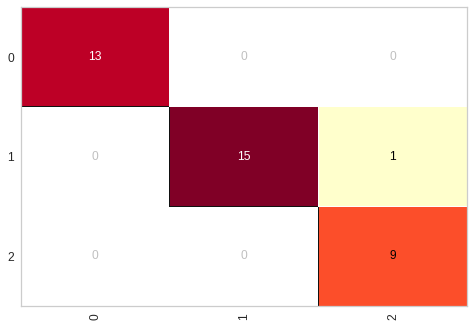

In [67]:
cm = ConfusionMatrix(arvore_Iris)
cm.fit(X_Iris_treinamento, Y_Iris_treinamento)
cm.score(X_Iris_teste,Y_Iris_teste)

**Avaliando Precisão e Sensibilidade**

In [68]:
print (classification_report(Y_Iris_teste,previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



#Visualizando a Árvore

In [69]:
arvore_Iris.classes_

array([0, 1, 2])

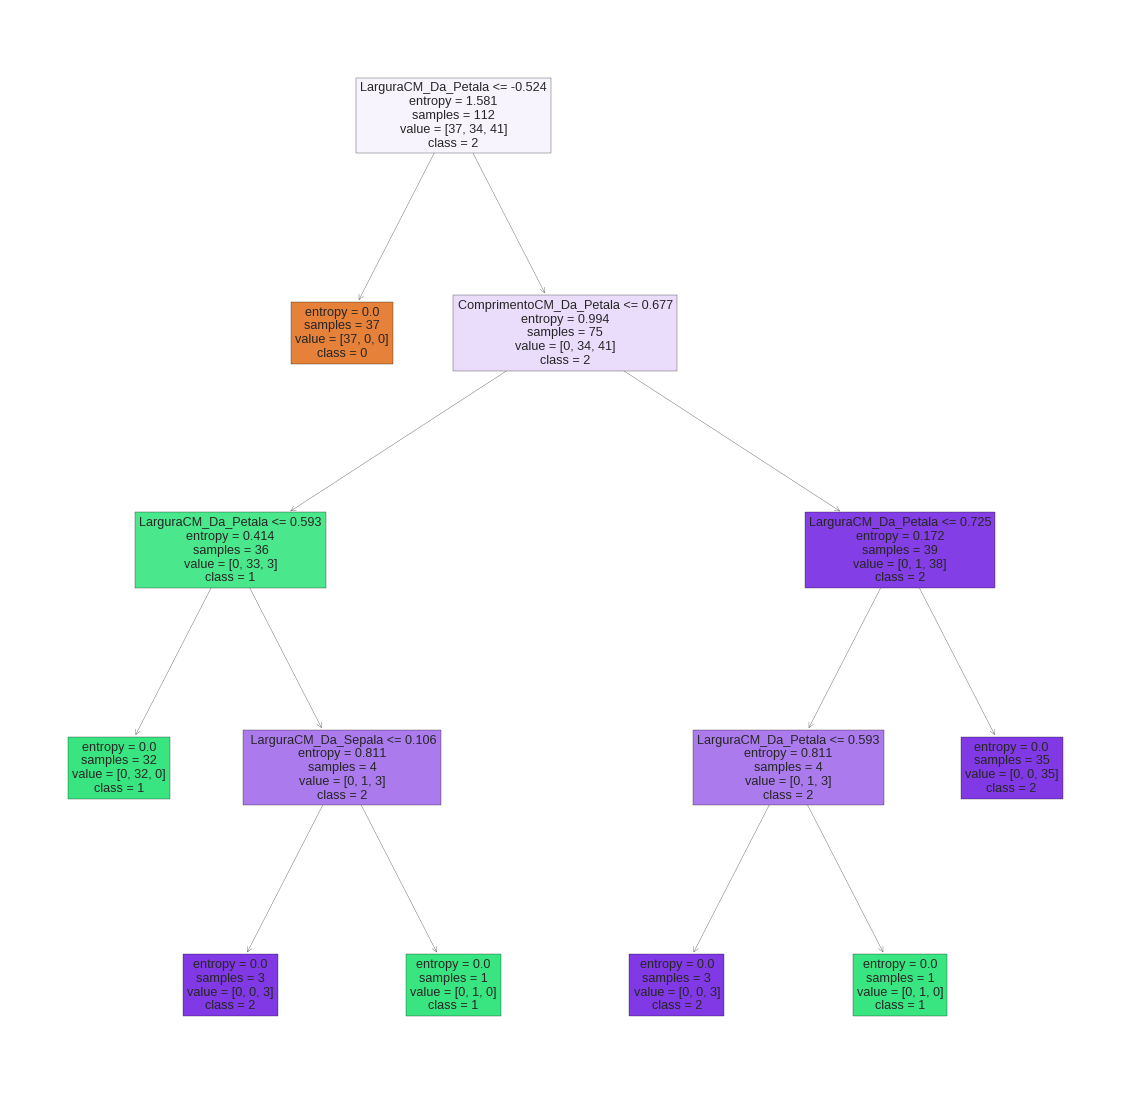

In [70]:
previsores=['ComprimentoCM_Da_Sepala',' LarguraCM_Da_Sepala','ComprimentoCM_Da_Petala','LarguraCM_Da_Petala']
figura,axis = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(arvore_Iris,feature_names= previsores,class_names=['0','1','2'],filled= True);


#Concluindo

**Percebe-se  que o algoritmo tem boa acurácia, precisão e  sensibilidade estando bastante adequado para identificar as espécies da planta do gênero Iris. Ou seja, o  problema deste Projeto estaria resolvido.**